# Exploratory Data Analysis (EDA)

In [114]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_seq_items', None)
sns.set_style("whitegrid")

In [116]:
# Set a random seed for reproducibility across the entire script
np.random.seed(42)
import random
random.seed(42)

## 1. Data Loading

In [118]:
# Load the Data
df = pd.read_csv('df.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_18348\2630924553.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df.csv')


## 2. Initial data exploration

In [120]:
print("\nInitial Data Inspection")
print(f"Dataset shape (rows, columns): {df.shape}")
print("\nDataset columns:")
print(df.columns)
print("\nDataset information (data types, non-null counts):")
df.info()
print("\nBasic descriptive statistics for numerical columns:")
print(df.describe().T)
# Missing Values Analysis
print("\nMissing Values Analysis")
missing_values_count = df.isnull().sum()
missing_values_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percent': missing_values_percent
})
# Filter to show only columns with missing values
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

if not missing_df.empty:
    print("Columns with missing values:")
    print(missing_df)
else:
    print("No missing values found in the dataset.")


Initial Data Inspection
Dataset shape (rows, columns): (45000, 1650)

Dataset columns:
Index(['Info_PepID', 'Info_protein_id', 'Info_pos', 'Info_AA',
       'Info_epitope_id', 'Info_sourceOrg_id', 'Info_host_id', 'Info_nPos',
       'Info_nNeg', 'Info_type', 'Info_organism_id', 'Info_window',
       'Info_group', 'Info_split', 'Class', 'feat_Entropy', 'feat_MolWeight',
       'feat_AAtypes_Tiny', 'feat_AAtypes_Small', 'feat_AAtypes_Aliphatic',
       'feat_AAtypes_Aromatic', 'feat_AAtypes_NonPolar', 'feat_AAtypes_Polar',
       'feat_AAtypes_Charged', 'feat_AAtypes_Basic', 'feat_AAtypes_Acidic',
       'feat_Atoms_nC', 'feat_Atoms_nH', 'feat_Atoms_nN', 'feat_Atoms_nO',
       'feat_Atoms_nS', 'feat_AAC_A', 'feat_AAC_R', 'feat_AAC_N', 'feat_AAC_D',
       'feat_AAC_C', 'feat_AAC_E', 'feat_AAC_Q', 'feat_AAC_G', 'feat_AAC_H',
       'feat_AAC_I', 'feat_AAC_L', 'feat_AAC_K', 'feat_AAC_M', 'feat_AAC_F',
       'feat_AAC_P', 'feat_AAC_S', 'feat_AAC_T', 'feat_AAC_W', 'feat_AAC_Y',
       'fe

## 3. Analysing the target variable for class imbalance


Number of Info_ columns: 14
Number of feat_ columns: 1635
Target column: Class

Target Variable 'Class' Analysis
Class distribution:
Class
-1    44668
 1      332
Name: count, dtype: int64
Percentage of each class:
Class
-1    99.262222
 1     0.737778
Name: proportion, dtype: float64


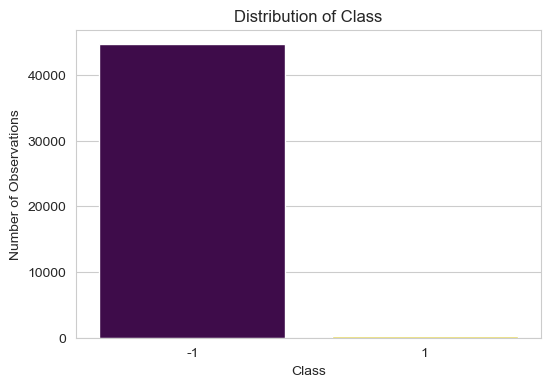

In [122]:
# Separate Info_ columns and feat_ columns
info_cols = [col for col in df.columns if col.startswith('Info_')]
feat_cols = [col for col in df.columns if col.startswith('feat_')]
target_col = 'Class'
print(f"\nNumber of Info_ columns: {len(info_cols)}")
print(f"Number of feat_ columns: {len(feat_cols)}")
print(f"Target column: {target_col}")

# Target Variable Analysis (Class Imbalance)
print(f"\nTarget Variable '{target_col}' Analysis")
class_counts = df[target_col].value_counts()
print("Class distribution:")
print(class_counts)
print(f"Percentage of each class:\n{df[target_col].value_counts(normalize=True) * 100}")
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df,hue=target_col, palette='viridis',legend=False)
plt.title(f'Distribution of {target_col}')
plt.xlabel(target_col)
plt.ylabel('Number of Observations')
plt.show()

## 4. Feature Analysis

In [124]:
# Feature Type and Scale Analysis (for feat_ columns)
print("\n--- Feature Type and Scale Analysis (feat_ columns) ---")
# Check data types of feature columns
feat_dtypes = df[feat_cols].dtypes
print("Data types of feature columns (first 10 if many):")
print(feat_dtypes.value_counts())
# Get descriptive statistics for a sample of first 5 feature columns
print("Descriptive statistics for a sample of feat_ columns (first 5):")
print(df[feat_cols[:5]].describe().T)
# filtering to find some interesting columns
desc_df = df[feat_cols].describe().T
print("\n--- Features with very low standard deviation (potentially constant) ---")
# These might be features that don't vary much and could be removed later.
print(desc_df[desc_df['std'] < 0.01])
print("\n--- Features with very high maximum values (potential outliers or different scales) ---")
# Find features where the max value is very high (e.g., greater than 1000)
print(desc_df[desc_df['max'] > 1000])


--- Feature Type and Scale Analysis (feat_ columns) ---
Data types of feature columns (first 10 if many):
float64    1628
int64         7
Name: count, dtype: int64
Descriptive statistics for a sample of feat_ columns (first 5):
                          count         mean         std          min  \
feat_Entropy            45000.0     2.963995    0.385034     0.699843   
feat_MolWeight          45000.0  1883.791208  148.303010  1198.130000   
feat_AAtypes_Tiny       45000.0     0.354167    0.159486     0.000000   
feat_AAtypes_Small      45000.0     0.574204    0.175301     0.000000   
feat_AAtypes_Aliphatic  45000.0     0.280793    0.152201     0.000000   

                                25%          50%          75%          max  
feat_Entropy               2.789898     3.006239     3.189898     3.906891  
feat_MolWeight          1788.850000  1886.910000  1986.180000  2415.760000  
feat_AAtypes_Tiny          0.266667     0.333333     0.466667     1.000000  
feat_AAtypes_Small      

## 5. Group based Analysis

In [126]:
# Info_group Analysis (Crucial for Data Splitting)
print(f"\n--- Info_group Analysis ---")
if 'Info_group' in df.columns:
    group_counts = df['Info_group'].value_counts()
    print("Distribution of observations across Info_group:")
    print(group_counts)
    print(f"Number of unique Info_group values: {df['Info_group'].nunique()}")
    print("This column is crucial for proper data splitting to avoid data leakage.")
    # You might want to check if certain groups are heavily dominated by one class,
    # or if the target class distribution is balanced within groups.
else:
    print("Info_group column not found. Please verify column names if expected.")


--- Info_group Analysis ---
Distribution of observations across Info_group:
Info_group
45     1268
21     1256
20     1256
24     1207
29     1054
35     1028
36     1022
37     1008
42      986
12      986
48      915
116     877
43      872
51      854
52      846
9       835
54      769
185     679
31      629
70      622
234     615
79      574
80      559
86      550
153     546
89      542
91      527
94      525
97      518
101     511
103     498
107     492
286     484
113     481
112     476
118     473
129     455
147     437
144     429
22      428
146     427
163     419
159     417
160     415
155     413
169     411
167     398
182     396
186     393
170     392
191     390
183     385
189     382
190     380
202     376
205     373
197     372
210     363
184     355
217     353
226     353
238     334
264     310
267     307
255     306
263     304
262     297
276     290
283     283
291     269
288     268
305     264
273     263
270     260
311     258
313     257


## 6. Visualization

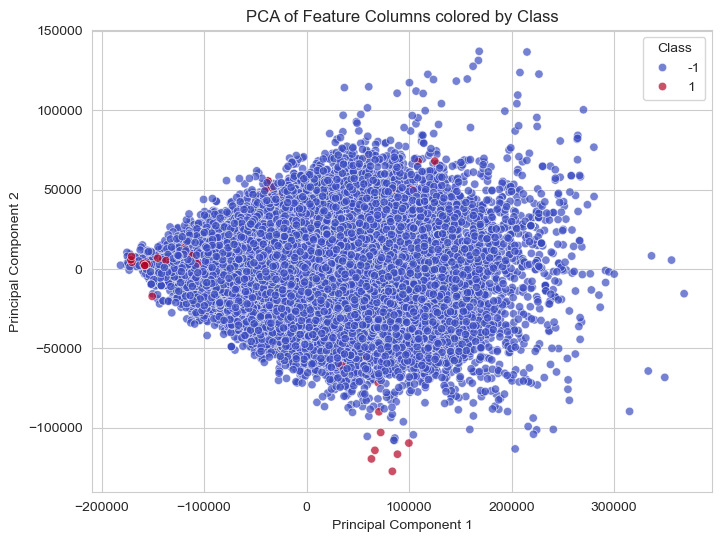

Explained variance ratio by first 2 principal components: 0.91


In [128]:
# High-Dimensional Data Exploration
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[feat_cols])
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
pca_df['Class'] = df['Class']
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='coolwarm', alpha=0.7)
plt.title('PCA of Feature Columns colored by Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print(f"Explained variance ratio by first 2 principal components: {pca.explained_variance_ratio_.sum():.2f}")

# Data Pre-processing

## 1. Separating Features(X), Target(y) and Group Information

In [131]:
info_cols = [col for col in df.columns if col.startswith('Info_')]
feat_cols = [col for col in df.columns if col.startswith('feat_')]
target_col = 'Class'

y = df[target_col]
# Convert target labels from -1 to 0, as many sklearn/imblearn functions expect [0, 1] for binary classification
y = y.replace(-1, 0)
print("Target labels converted: -1 -> 0.")

# Ensure groups is correctly extracted and has no NaNs
if 'Info_group' in df.columns:
    groups = df['Info_group']
    if 'Info_group' in info_cols:
        info_cols.remove('Info_group')
    print(f"Info_group column identified for group-based splitting.")

X = df[feat_cols]

object_features_in_X = X.select_dtypes(include='object').columns
if not object_features_in_X.empty:
    print(f"\nFound object dtype features in X (from feat_cols): {list(object_features_in_X)}")
    print("Dropping these object columns to proceed with numerical pipeline.")
    X = X.drop(columns=object_features_in_X)
    feat_cols = [col for col in feat_cols if col not in object_features_in_X]
else:
    print("\nNo object dtype features found in X (feat_cols). All features are numerical.")

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Groups shape: {groups.shape}")

Target labels converted: -1 -> 0.
Info_group column identified for group-based splitting.

No object dtype features found in X (feat_cols). All features are numerical.
Features (X) shape: (45000, 1635)
Target (y) shape: (45000,)
Groups shape: (45000,)


## 2. Variable scaling

In [133]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Fills missing values with the median of the column
    ('scaler', StandardScaler()) # Scales features to have mean=0 and std=1
])

print("\nApplying numerical preprocessing pipeline (Imputation and Scaling)...")
# Apply the pipeline to our numerical features (X)
X_processed = numerical_transformer.fit_transform(X)

# Convert back to DataFrame for easier inspection and subsequent steps
X_processed = pd.DataFrame(X_processed, columns=X.columns, index=X.index)
print("Numerical preprocessing complete. X_processed shape:", X_processed.shape)
print("Sample of processed data (first 5 rows, first 5 columns):")
print(X_processed.iloc[:5, :5])


Applying numerical preprocessing pipeline (Imputation and Scaling)...
Numerical preprocessing complete. X_processed shape: (45000, 1635)
Sample of processed data (first 5 rows, first 5 columns):
   feat_Entropy  feat_MolWeight  feat_AAtypes_Tiny  feat_AAtypes_Small  \
0     -0.367283        0.077267          -0.130634           -0.993756   
1     -0.452164        0.306665          -0.130634           -0.993756   
2     -0.321457        0.239167           0.287380           -0.613453   
3     -0.667751        0.333772           0.287380           -0.613453   
4     -0.946455        0.563169           0.287380           -0.613453   

   feat_AAtypes_Aliphatic  
0                1.221258  
1                0.783234  
2                0.345211  
3                0.345211  
4               -0.092812  


## 3. Feature Reduction

In [135]:
# --- 4. Feature Reduction (using PCA) ---
# Based on EDA, PCA is a good candidate for reducing 1600+ features.
# We'll choose a number of components that explains a high percentage of variance.
# We found 2 components explain 91%, but for modeling, we might want more.
# Let's aim for a higher explained variance if possible, or a fixed number of components.
# For demonstration, let's target 95% explained variance, or a reasonable fixed number like 100 components.
# If 91% is for the first 2, getting to 95% might require many more.
# Let's try 100 components first, and then we can adjust based on explained variance.
from sklearn.decomposition import PCA
n_components_pca = 200
pca = PCA(n_components=n_components_pca, random_state=42)

print(f"\nApplying PCA with {n_components_pca} components for feature reduction...")
X_pca = pca.fit_transform(X_processed)

# Convert PCA output to DataFrame for consistency
pca_col_names = [f'PC_{i+1}' for i in range(n_components_pca)]
X_pca = pd.DataFrame(X_pca, columns=pca_col_names, index=X.index)

print(f"PCA complete. X_pca shape: {X_pca.shape}")
print(f"Cumulative explained variance by {n_components_pca} components: {pca.explained_variance_ratio_.sum():.4f}")
print("Sample of PCA-transformed data (first 5 rows, first 5 components):")
print(X_pca.iloc[:5, :5])


Applying PCA with 200 components for feature reduction...
PCA complete. X_pca shape: (45000, 200)
Cumulative explained variance by 200 components: 0.6976
Sample of PCA-transformed data (first 5 rows, first 5 components):
        PC_1      PC_2      PC_3      PC_4      PC_5
0 -11.334477  6.466957 -7.449148 -8.036833 -1.906801
1 -12.450561  5.053848 -6.461522 -7.951935 -1.396914
2 -11.504475  4.638362 -6.180835 -8.099238 -0.213504
3 -10.301232  5.529676 -8.401692 -8.086392 -3.662458
4 -10.999087  4.633658 -6.145345 -8.296723 -1.996891


## 4. Class Rebalancing

In [137]:
# This step is CRUCIAL due to the severe class imbalance.
# IMPORTANT: In a real cross-validation setup, SMOTE should ONLY be applied to the TRAINING fold
# to prevent data leakage. For this demonstration, we apply it to the full processed X_pca and y.
from imblearn.over_sampling import SMOTE
print("\n--- Applying SMOTE for Class Rebalancing (for demonstration purposes) ---")
print(f"Original class distribution: {y.value_counts()}")

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

print(f"Resampled X_resampled shape: {X_resampled.shape}")
print(f"Resampled y_resampled shape: {y_resampled.shape}")
print(f"New class distribution after SMOTE: {y_resampled.value_counts()}")

print("\nData Preprocessing Complete!")
print("X_resampled and y_resampled are now ready for model training with balanced classes.")


--- Applying SMOTE for Class Rebalancing (for demonstration purposes) ---
Original class distribution: Class
0    44668
1      332
Name: count, dtype: int64
Resampled X_resampled shape: (89336, 200)
Resampled y_resampled shape: (89336,)
New class distribution after SMOTE: Class
0    44668
1    44668
Name: count, dtype: int64

Data Preprocessing Complete!
X_resampled and y_resampled are now ready for model training with balanced classes.


# Modelling

## 1. Preprocessing pipeline

In [140]:
# Feature Selection instead of PCA
# We'll use SelectKBest with mutual_info_classif to select top features
from sklearn.feature_selection import SelectKBest, mutual_info_classif

n_features_to_select = 100
numerical_preprocessing_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=n_features_to_select))
])
print(f"\nDefined numerical preprocessing pipeline (Imputer, Scaler, SelectKBest with {n_features_to_select} features using Mutual Information).")


Defined numerical preprocessing pipeline (Imputer, Scaler, SelectKBest with 100 features using Mutual Information).


## 2. Classification models

In [142]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Calculate scale_pos_weight once for XGBoost
scale_pos_weight_value = y.value_counts()[0] / y.value_counts()[1]
print(f"Calculated scale_pos_weight for XGBoost: {scale_pos_weight_value:.2f}")

models = {
    'RandomForestClassifier': RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        class_weight='balanced' # Directly handles imbalance by weighting classes
    ),
    'XGBoostClassifier': XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss',
        n_jobs=-1,
        scale_pos_weight=scale_pos_weight_value # Directly handles imbalance by weighting positive samples
    )
}
print("\nDefined Random Forest and XGBoost classifiers with direct class imbalance handling.")

Calculated scale_pos_weight for XGBoost: 134.54

Defined Random Forest and XGBoost classifiers with direct class imbalance handling.


## 3. Model training using cross-validation

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
import time 

# Setting up GroupKFold for Cross-Validation
n_splits = 5
gkf = GroupKFold(n_splits=n_splits)
print(f"\nInitialized GroupKFold with {n_splits} splits for cross-validation.")

# Group-based Cross-Validation and Model Training
final_results = {}
print(f"\nStarting Group-based Cross-Validation for each model...")

for model_name, model in models.items():
    print(f"\n--- Training and Evaluating {model_name} ---")

    
    
    # Store metrics for each outer GroupKFold fold
    outer_fold_metrics = {
        'balanced_accuracy': [],
        'precision_class_1': [],
        'recall_class_1': [],
        'f1_class_1': [],
        'roc_auc': []
    }
    outer_fold_times = []

    # Outer loop: GroupKFold for generalization performance
    for fold, (train_index, test_index) in enumerate(gkf.split(X, y, groups)):
        start_time_fold = time.time()
        print(f"\nFold {fold + 1}/{n_splits} (Outer GroupKFold)")

        X_train_outer, X_test_outer = X.iloc[train_index], X.iloc[test_index]
        y_train_outer, y_test_outer = y.iloc[train_index], y.iloc[test_index]

        print(f"  Original Train Outer Fold Shape: {X_train_outer.shape}, Test Outer Fold Shape: {X_test_outer.shape}")
        print(f"  Original Train Outer Class Distribution: {y_train_outer.value_counts()}")
        print(f"  Original Test Outer Class Distribution: {y_test_outer.value_counts()}")


        # --- Apply Preprocessing Pipeline to outer fold's data ---
        # fit_transform on outer training data, transform on outer test data
        # The feature_selection step (SelectKBest) will learn which features to select
        # based on the training data of this fold.
        X_train_processed = numerical_preprocessing_pipeline.fit_transform(X_train_outer, y_train_outer) # y_train_outer needed for mutual_info_classif
        X_test_processed = numerical_preprocessing_pipeline.transform(X_test_outer)

        # X_train_processed and X_test_processed are now NumPy arrays from SelectKBest
        # We don't need to convert them back to DataFrame for SMOTE or model fitting,
        # as they expect 2D arrays.

        print(f"  Processed Train Outer Fold Shape (after Feature Selection): {X_train_processed.shape}")
        print(f"  Processed Test Outer Fold Shape (after Feature Selection): {X_test_processed.shape}")


        # --- Apply SMOTE only to the training data of this OUTER fold ---
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train_outer)

        print(f"  Resampled Train Outer Fold Shape (after SMOTE): {X_train_resampled.shape}")
        print(f"  Resampled Train Outer Class Distribution: {y_train_resampled.value_counts()}")
        # Note: X_test_processed and y_test_outer remain imbalanced and are NOT resampled

        # --- Train the Model ---
        print(f"  Training {model_name}...")
        model.fit(X_train_resampled, y_train_resampled)
        print(f"  Training complete for {model_name}.")

        # --- Make Predictions on the UNRESAMPLED Test Data ---
        y_pred = model.predict(X_test_processed)
        y_proba = model.predict_proba(X_test_processed)[:, 1]

        # --- Calculate Performance Metrics ---
        bal_acc = balanced_accuracy_score(y_test_outer, y_pred)
        prec_1 = precision_score(y_test_outer, y_pred, pos_label=1, zero_division=0)
        rec_1 = recall_score(y_test_outer, y_pred, pos_label=1, zero_division=0)
        f1_1 = f1_score(y_test_outer, y_pred, pos_label=1, zero_division=0)
        try:
            if len(np.unique(y_test_outer)) > 1:
                roc_auc = roc_auc_score(y_test_outer, y_proba)
            else:
                roc_auc = np.nan
        except ValueError:
            roc_auc = np.nan

        outer_fold_metrics['balanced_accuracy'].append(bal_acc)
        outer_fold_metrics['precision_class_1'].append(prec_1)
        outer_fold_metrics['recall_class_1'].append(rec_1)
        outer_fold_metrics['f1_class_1'].append(f1_1)
        outer_fold_metrics['roc_auc'].append(roc_auc)

        end_time_fold = time.time()
        fold_time = end_time_fold - start_time_fold
        outer_fold_times.append(fold_time)

        print(f"  Outer Fold Balanced Accuracy: {bal_acc:.4f}")
        print(f"  Outer Fold Precision (Class 1): {prec_1:.4f}")
        print(f"  Outer Fold Recall (Class 1) / Sensitivity: {rec_1:.4f}")
        print(f"  Outer Fold F1-Score (Class 1): {f1_1:.4f}")
        print(f"  Outer Fold ROC AUC: {roc_auc:.4f}")
        print(f"  Outer Fold Time: {fold_time:.2f} seconds")
# Summarize Results for the current model across all OUTER folds ---
    avg_metrics = {metric: np.mean(values) for metric, values in outer_fold_metrics.items()}
    std_metrics = {metric: np.std(values) for metric, values in outer_fold_metrics.items()}
    avg_time = np.mean(outer_fold_times)

    final_results[model_name] = {
        'average_metrics': avg_metrics,
        'std_dev_metrics': std_metrics,
        'average_time': avg_time,
    }

    print(f"\n--- Average Metrics for {model_name} across {n_splits} Outer Folds ---")
    for metric, value in avg_metrics.items():
        print(f"  {metric.replace('_', ' ').title()}: {value:.4f} (+/- {std_metrics[metric]:.4f})")
    print(f"  Average Outer Fold Time: {avg_time:.2f} seconds")


print("\n--- All Models Evaluation Complete ---")
print("\nFinal Results Summary:")
for model_name, res in final_results.items():
    print(f"\nModel: {model_name}")
    for metric, value in res['average_metrics'].items():
        print(f"  {metric.replace('_', ' ').title()}: {value:.4f} (+/- {res['std_dev_metrics'][metric]:.4f})")
    print(f"  Average Fold Time: {res['average_time']:.2f} seconds")


Initialized GroupKFold with 5 splits for cross-validation.

Starting Group-based Cross-Validation for each model...

--- Training and Evaluating RandomForestClassifier ---

Fold 1/5 (Outer GroupKFold)
  Original Train Outer Fold Shape: (36063, 1635), Test Outer Fold Shape: (8937, 1635)
  Original Train Outer Class Distribution: Class
0    35864
1      199
Name: count, dtype: int64
  Original Test Outer Class Distribution: Class
0    8804
1     133
Name: count, dtype: int64
  Processed Train Outer Fold Shape (after Feature Selection): (36063, 100)
  Processed Test Outer Fold Shape (after Feature Selection): (8937, 100)
  Resampled Train Outer Fold Shape (after SMOTE): (71728, 100)
  Resampled Train Outer Class Distribution: Class
0    35864
1    35864
Name: count, dtype: int64
  Training RandomForestClassifier...
  Training complete for RandomForestClassifier.
  Outer Fold Balanced Accuracy: 0.5150
  Outer Fold Precision (Class 1): 1.0000
  Outer Fold Recall (Class 1) / Sensitivity: 0.

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:37:33] WARNING: D:\bld\xgboost-split_1737531311373\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Training complete for XGBoostClassifier.
  Outer Fold Balanced Accuracy: 0.5333
  Outer Fold Precision (Class 1): 0.4737
  Outer Fold Recall (Class 1) / Sensitivity: 0.0677
  Outer Fold F1-Score (Class 1): 0.1184
  Outer Fold ROC AUC: 0.8174
  Outer Fold Time: 352.54 seconds

Fold 2/5 (Outer GroupKFold)
  Original Train Outer Fold Shape: (35917, 1635), Test Outer Fold Shape: (9083, 1635)
  Original Train Outer Class Distribution: Class
0    35611
1      306
Name: count, dtype: int64
  Original Test Outer Class Distribution: Class
0    9057
1      26
Name: count, dtype: int64
